In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [62]:
df = pd.DataFrame.from_csv("mst_sizes_largest.csv", index_col=None)

In [63]:
df.shape

(840, 5)

In [109]:
summary = df.groupby(["Nodes", "Dimension"]).mean().reset_index()

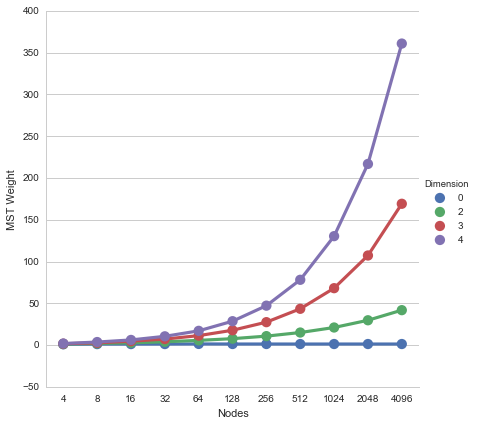

In [106]:
sns.factorplot(x="Nodes", y="Size", data=df, hue="Dimension", size=6)
plt.ylabel("MST Weight")

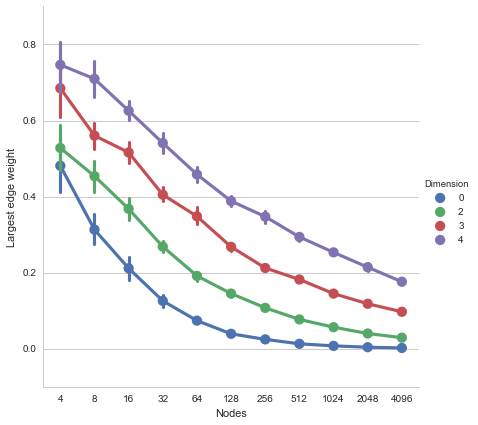

In [108]:
sns.factorplot(x="Nodes", y="Largest", data=df, hue="Dimension", size=6)
plt.ylabel("Largest edge weight")

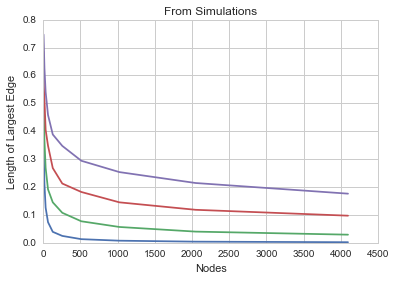

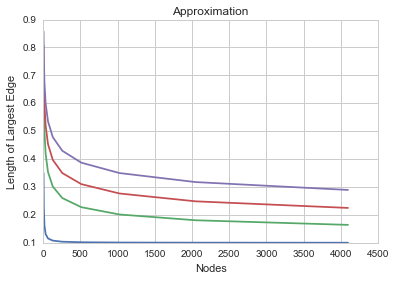

In [107]:
x = list(summary[summary.Dimension == 4].Nodes)
y0 = list(summary[summary.Dimension == 0].Largest)
y2 = list(summary[summary.Dimension == 2].Largest)
y3 = list(summary[summary.Dimension == 3].Largest)
y4 = list(summary[summary.Dimension == 4].Largest)


def func(x, k, n):
    return float(k)/(x**n) + .1

yf0 = [func(n, 1, 1.0) for n in x]
yf2 = [func(n, 1, .33) for n in x]
yf3 = [func(n, 1, .25) for n in x]
yf4 = [func(n, 1, .20) for n in x]



plt.plot(x, y0, x, y2, x, y3, x, y4)
plt.xlabel("Nodes")
plt.ylabel("Length of Largest Edge")
plt.title("From Simulations")
plt.show()
plt.plot(x, yf0, x, yf2, x, yf3, x, yf4)
plt.xlabel("Nodes")
plt.ylabel("Length of Largest Edge")
plt.title("Approximation")
plt.show()

It looks like our approximation (for dimension == 4) is something like 
$$ k(x) = 1/x^{1/5}$$

for a n-dimensional space, for input size x, we have:
$$k(x, n) = x^{-1/(n+1)}$$